## Visualization of CNN weights

### Import Libraries

In [2]:
from keras.datasets import fashion_mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from scipy.misc import toimage #(*)
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

### Hyperparameters

In [3]:
batch_size = 100
epoch = 1
num_classes = 10

### Import Data

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

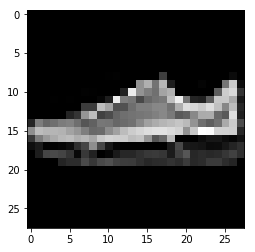

In [6]:
im = x_test[9]
plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
x_train_RS = x_train.reshape(60000, 28, 28, 1)
x_test_RS  = x_test.reshape(x_test.shape[0], 28, 28, 1)

(60000, 28, 28, 1)


In [13]:
print(y_train.shape)

(60000,)


In [ ]:
x_train_RS = x_train_RS.astype('float32')
x_test_RS  = x_test_RS.astype('float32')

x_train_RS /= 255
x_test_RS  /= 255

### Model

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [16]:
print(model.count_params())

225034
